### Практика. Обучаем персептрон

Для решения задачи бинарной классификации в случае линейной разделимости образцов можно обучить простейший персептрон, устроенный по такой схеме:
<div align="center">

![](img/1.png)
</div>

Эта конструкция реализует ровно тот принцип, который был описан выше. Вычисляется линейная комбинация:

$\sum_{i = 1}^{n}{w_ix_i}+b$

По значению которой решатель (decision unit) принимает решение отнести образец к одному из двух классов по следующему принципу:

$w^T x + b \ge 0$ класс +1 (зелёные точки)
$w^T x + b < 0$ класс -1 (красные точки)

Изначально веса инициализируются случайным образом, а на каждом шаге обучения для каждого образца проделывается следующий алгоритм:

Вычисляется предсказание (predicted label). Если оно не совпадает с реальным классом, то веса обновляются по следующему принципу:

$w_{new} = w_{old} + y_nx_n \\ b_{new} = b_{old} + y_n$


где $y_n$ — реальный класс образца $x_n$. Почему это работает описано выше в умозрительном упражнении с переходом в пространство весов. Кратко:

Доворачиваем вектор-вес в сторону верного класса: по нормали $x_n$ в случае класса +1; против нормали $x_n$ в случае класса -1. (Сама нормаль всегда смотрит в сторону класса +1.)
Обновляем смещение по аналогичному принципу.

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/3011049871.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='green')
/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/3011049871.py:89: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='red')


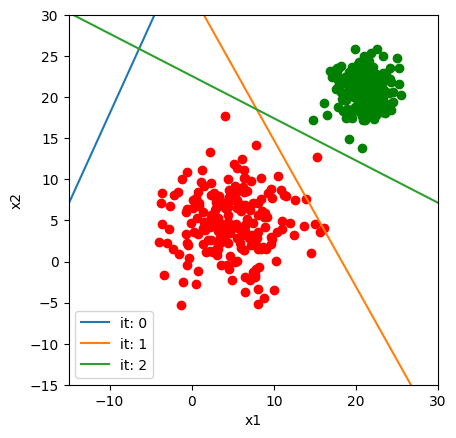

In [15]:
import seaborn

# необходимые пакеты
import matplotlib.pyplot as plt
import numpy as np

# воспроизводимость — наше всё
np.random.seed(19)

# генерируем диапазон зелёных точек
x1x2_green = np.random.randn(200, 2) * 2 + 21

# генерируем диапазон красных точек
x1x2_red = np.random.randn(200, 2) * 4 + 5

# все яйца в одну корзину
x1x2 = np.concatenate((x1x2_green, x1x2_red))

# проставляем классы: зелёные +1, красные -1
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

# хорошенько перемешиваем
indices = np.array(range(x1x2.shape[0]))
np.random.shuffle(indices)
x1x2 = x1x2[indices]
labels = labels[indices]

# случайные начальные веса
w1_ = -1.1
w2_ = 0.5
b_ = -20

# разделяющая гиперплоскость (граница решений)
def lr_line(x1, x2):
    return w1_ * x1 + w2_ * x2 + b_

# ниже границы -1
# выше +1
def decision_unit(value):
    return -1 if value < 0 else 1

# добавляем начальное разбиение в список
lines = [[w1_, w2_, b_]]

for max_iter in range(100):
    # счётчик неверно классифицированных примеров
    # для ранней остановки
    mismatch_count = 0
    
    # по всем образцам
    for i, (x1, x2) in enumerate(x1x2):
        # считаем значение линейной комбинации на гиперплоскости
        value = lr_line(x1, x2)
        
        # класс из тренировочного набора (-1, +1)
        true_label = int(labels[i])
        
        # предсказанный класс (-1, +1)
        pred_label = decision_unit(value)
        
        # если имеет место ошибка классификации
        if (true_label != pred_label):
            # корректируем веса в сторону верного класса, т.е.
            # идём по нормали — (x1, x2) — в случае класса +1
            # или против нормали — (-x1, -x2) — в случае класса -1
            # т.к. нормаль всегда указывает в сторону +1
            w1_ = w1_ + x1 * true_label
            w2_ = w2_ + x2 * true_label
            
            # смещение корректируется по схожему принципу
            b_ = b_ + true_label
            
            # считаем количество неверно классифицированных примеров
            mismatch_count = mismatch_count + 1
    
    # если была хотя бы одна коррекция
    if (mismatch_count > 0):
        # запоминаем границу решений
        lines.append([w1_, w2_, b_])
    else:
        # иначе — ранняя остановка
        break

# рисуем точки (по последней границе решений)
for i, (x1, x2) in enumerate(x1x2):
    pred_label = decision_unit(lr_line(x1, x2))

    if (pred_label < 0):
        plt.plot(x1, x2, 'ro', color='red')
    else:
        plt.plot(x1, x2, 'ro', color='green')

# выставляем равное пиксельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')    

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# служебный диапазон для визуализации границы решений
x1_range = np.arange(-30, 50, 0.1)

# функционал, возвращающий границу решений в пригодном для отрисовки виде
# x2 = f(x1) = -(w1 * x1 + b) / w2
def f_lr_line(w1, w2, b):
    def lr_line(x1):
        return -(w1 * x1 + b) / w2
    
    return lr_line

# отрисовываем историю изменения границы решений
it = 0
for coeff in lines:
    lr_line = f_lr_line(coeff[0], coeff[1], coeff[2])
    
    plt.plot(x1_range, lr_line(x1_range), label = 'it: ' + str(it))
    
    it += 1
    
# зум
plt.axis([-15, 30, -15, 30])
    
# легенда
plt.legend(loc = 'lower left')
  
# на экран!
plt.show()

Заглянем теперь в пространство весов $W$ (weight space):

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/2967328629.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(w1_, w2_, 'ro', color='blue')


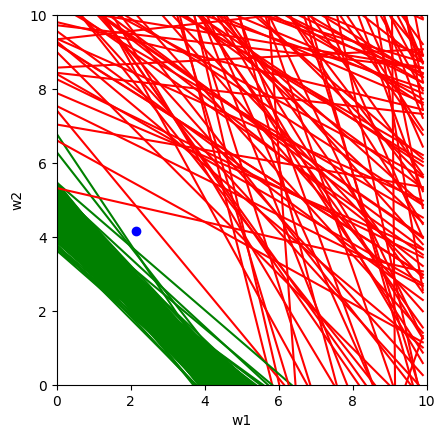

In [16]:
# диапазон весов по оси
w1_range = np.arange(0, 10, 0.1)

for i, (x1, x2) in enumerate(x1x2):
    if (labels[i] == 1):
        color = 'green'
    else:
        color = 'red'

    # линия x1 * w1 + x2 * w2 + b = 0
    # в форме w2 = f(w1)
    # (для визуализации)
    def line(w1):
        return -(x1 * w1 + b_) / x2
    
    # русуем образцы; в пространстве весов — это линии
    plt.plot(w1_range, line(w1_range), color = color)
    
# рисуем финальный вес, полученный после обучения персептрона
plt.plot(w1_, w2_, 'ro', color='blue')

# зум
plt.axis([0, 10, 0, 10])
    
# выставляем равное пикслельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# проставляем названия осей
plt.xlabel('w1')
plt.ylabel('w2')    
    
# на экран!
plt.show()

Красные и зелёные линии — это исходные образцы, синяя точка — итоговый вес.

А какие ещё веса дают верную классификацию? Смотрим:

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/4015086089.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(w1_, w2_, 'ro', color='blue')
/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/4015086089.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(w1, w2, 'ro', color = 'magenta')


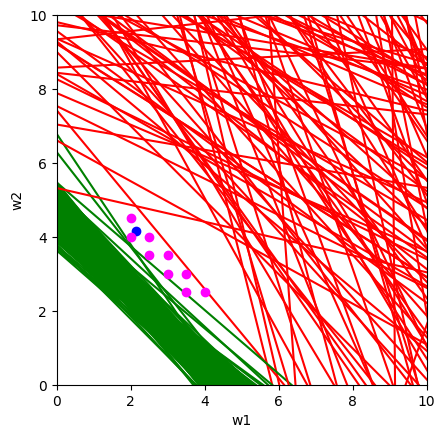

In [17]:
# диапазон в пространстве весов
w1_range = np.arange(0, 10, 0.5)
w2_range = np.arange(0, 10, 0.5)

# рисуем образцы, терерь уже линиями
for i, (x1, x2) in enumerate(x1x2):
    def line(w1):
        return -(x1 * w1 + b_) / x2    
    
    if (labels[i] == 1):
        color = 'green'
    else:
        color = 'red'       
    
    plt.plot(x1_range, line(x1_range), color = color)
        
# рисуем финальный вес (точка), полученный в ходе обучения персептрона
plt.plot(w1_, w2_, 'ro', color='blue')

# линейная комбинация
def f(w1, w2, x1, x2):
        value = x1 * w1 + x2 * w2 + b_
        
        return -1 if value < 0 else 1

# будем запоминать хорошие веса (дающие правильную классификацию)
# чтобы потом отсмотреть их в простанстве данных (data space)
good_weights = []

# перебором ищем все веса, которые лежат с нужной стороны от всех образцов
# нужная сторона определяется классом образца
for w1 in w1_range:
    for w2 in w2_range:
        in_range = True
        
        for i, (x1, x2) in enumerate(x1x2):
            if (labels[i] != f(w1, w2, x1, x2)):
                in_range = False
                break
                
        if (in_range):
            good_weights.append([w1, w2, b_])
            
            # хорошие веса рисуем фиолетовым (точки)
            plt.plot(w1, w2, 'ro', color = 'magenta')
    
# зум
plt.axis([0, 10, 0, 10])    

# выставляем равное пикслельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# проставляем названия осей
plt.xlabel('w1')
plt.ylabel('w2')   

# на экран!
plt.show()



Красные и зелёные линии — это исходные образцы, синяя точка — итоговый вес, фиолетовые точки — другие возможные веса.

И выворачиваем всё наизнанку ещё раз, переходя опять в пространство данных $X$ (data space):

/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/3943093197.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='green')
/var/folders/tt/2_4cmnrx3kn5bx5vr24w71fh0000gn/T/ipykernel_32597/3943093197.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, x2, 'ro', color='red')


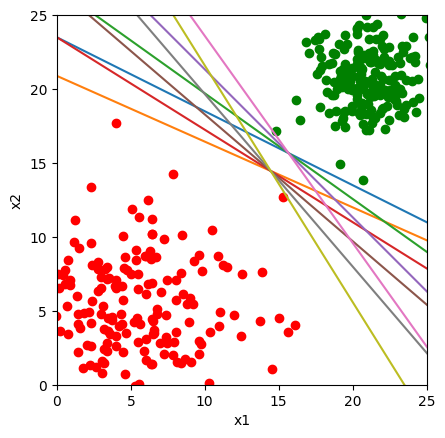

In [18]:

# разделяющая гиперплоскость (граница решений)
def lr_line(x1, x2):
    return w1_ * x1 + w2_ * x2 + b_

# ниже границы -1
# выше +1
def decision_unit(value):
    return -1 if value < 0 else 1

# рисуем точки (по последней границе решений)
for i, (x1, x2) in enumerate(x1x2):
    pred_label = decision_unit(lr_line(x1, x2))

    if (pred_label < 0):
        plt.plot(x1, x2, 'ro', color='red')
    else:
        plt.plot(x1, x2, 'ro', color='green')

# служебный диапазон для визуализации хороших весов
x1_range = np.arange(-30, 50, 0.1)            
            
for (w1, w2, _b) in good_weights:
    # веса опять стали коэффициентами, а x1, x2 — переменными
    def w_line(x1):
        return -(w1 * x1 + b_) / w2
    
    # граница решений в пространстве данных
    plt.plot(x1_range, w_line(x1_range))

# зум
plt.axis([0, 25, 0, 25])       
    
# выставляем равное пикслельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')    
    
# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')    
    
# на экран!
plt.show()